<a href="https://colab.research.google.com/github/shalujha/Titanic-Survivor-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/qxa6zowdlvn3ier/titanic.zip?dl=0

--2021-02-10 18:58:10--  https://www.dropbox.com/s/qxa6zowdlvn3ier/titanic.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qxa6zowdlvn3ier/titanic.zip [following]
--2021-02-10 18:58:11--  https://www.dropbox.com/s/raw/qxa6zowdlvn3ier/titanic.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c0cc31a3d562544fa8956ab4c.dl.dropboxusercontent.com/cd/0/inline/BIuAq0BOqXl_CYcJxHjq01MiS3625671ysMjgMtOYOKoWzEXWlSK1U_-g5410nEjAaYFUHuGrOevXBm0HcSa4zD3mur2KNFSiEMT1cB7AT-h3qOc5PXx9p-25QvPdXJjZqc/file# [following]
--2021-02-10 18:58:11--  https://uc3c0cc31a3d562544fa8956ab4c.dl.dropboxusercontent.com/cd/0/inline/BIuAq0BOqXl_CYcJxHjq01MiS3625671ysMjgMtOYOKoWzEXWlSK1U_-g5410nEjAaYFUHuGrOevXBm0HcSa4zD3mur2KNFSiEMT1cB7AT

In [ ]:
!unzip 'titanic.zip?dl=0' -d "data/"

Archive:  titanic.zip?dl=0
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_df=pd.read_csv('/content/data/train.csv')
test_df=pd.read_csv('/content/data/test.csv')
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
input_features=['Sex','Age','Name','Ticket','Pclass','Fare','SibSp']
print(input_features)
output_features=['Survived']

['Sex', 'Age', 'Name', 'Ticket', 'Pclass', 'Fare', 'SibSp']


In [ ]:
# number of null values in each column:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

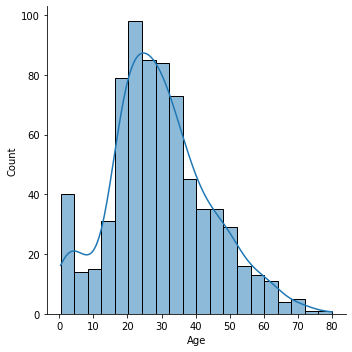

In [ ]:
sns.displot(train_df, x="Age",kde=True)

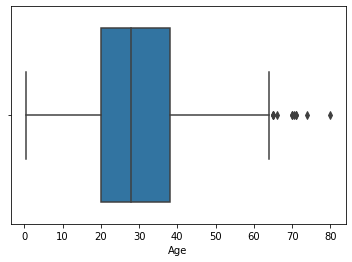

In [ ]:
# As we can see, there are some outliers in Age column, so we cant impute mean , we will have to impute median.
sns.boxplot(x=train_df['Age'])
plt.show()

In [ ]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df['Cabin']=train_df['Cabin'].fillna('Missing')

In [ ]:
train_df['Embarked']=train_df['Embarked'].fillna(str(train_df['Embarked'].mode()))

In [ ]:
train_df.info()
print(train_df.loc[train_df['Embarked'].isnull()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


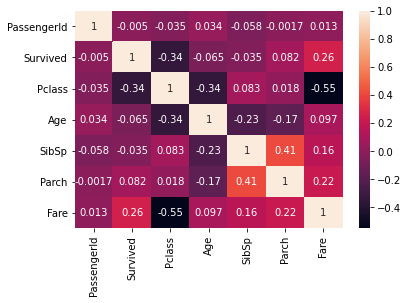

In [ ]:
sns.heatmap(train_df.corr(),annot=True)

In [ ]:
categorical_features=[]
for col in train_df.columns:
  if train_df[col].dtype=='object':
    categorical_features.append(col)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(len(categorical_features))

5


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_features:
  train_df[col]=le.fit_transform(train_df[col])

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,3


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# clean test data too:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())

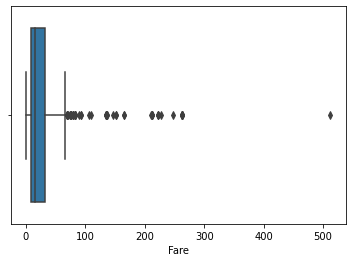

In [ ]:
sns.boxplot(x=test_df['Fare'])
plt.show()

In [ ]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Cabin']=test_df['Cabin'].fillna(str(test_df['Cabin'].mode()))
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
for col in categorical_features:
  test_df[col]=le.fit_transform(test_df[col])

In [ ]:
X=train_df[input_features]
Y=train_df[output_features]
test_df=test_df[input_features]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(712, 7) (712, 1) (179, 7) (179, 1)


In [ ]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
xgb=XGBClassifier()
gnb=GaussianNB()
svc=SVC()
linear_svc=LinearSVC()
gradient=GradientBoostingClassifier()
perceptron=Perceptron()
sgd=SGDClassifier()
svc.fit(X_train,Y_train)
linear_svc.fit(X_train,Y_train)
gradient.fit(X_train,Y_train)
perceptron.fit(X_train,Y_train)
sgd.fit(X_train,Y_train)
xgb.fit(X_train,Y_train)
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
print(lr.score(X_test,Y_test),dt.score(X_test,Y_test),rf.score(X_test,Y_test),knn.score(X_test,Y_test),xgb.score(X_test,Y_test),gnb.score(X_test,Y_test),svc.score(X_test,Y_test),
      linear_svc.score(X_test,Y_test),gradient.score(X_test,Y_test),perceptron.score(X_test,Y_test),sgd.score(X_test,Y_test))

0.8603351955307262 0.776536312849162 0.8435754189944135 0.6815642458100558 0.8715083798882681 0.8435754189944135 0.7039106145251397 0.5363128491620112 0.8770949720670391 0.6759776536312849 0.659217877094972


In [ ]:
print(dt.score(X_train,Y_train))
path=dt.cost_complexity_pruning_path(X_train,Y_train)
alphas=path['ccp_alphas'][:-1]
print(alphas)

1.0
[0.         0.00092256 0.00093633 0.0011236  0.00117041 0.00124844
 0.00124844 0.00126404 0.00127681 0.00127681 0.00128745 0.00132188
 0.00132647 0.00138649 0.00140449 0.00149813 0.00158999 0.00162787
 0.00162986 0.00168539 0.00181538 0.00187266 0.0019975  0.00204312
 0.00210674 0.00210674 0.00224719 0.00234082 0.00236546 0.00238764
 0.0024077  0.0024077  0.0024077  0.00241397 0.00249688 0.00249688
 0.00252538 0.00253307 0.00270867 0.00271267 0.00277454 0.00278062
 0.00294944 0.00298715 0.00310004 0.00403748 0.00488722 0.00556849
 0.00786985 0.01456638 0.01520347 0.03618333]


In [ ]:
scores=[]
for alpha in alphas:
  dt=DecisionTreeClassifier(ccp_alpha=alpha)
  scores.append(cross_val_score(dt,X,Y,cv=10).mean())

In [ ]:
print(scores[np.argmax(scores)])

0.8215480649188514


In [ ]:
dt=DecisionTreeClassifier(ccp_alpha=alphas[np.argmax(scores)])
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))
print(dt.score(X_test,Y_test))

0.8033707865168539
0.8212290502793296


In [ ]:
predictions=dt.predict(test_df)
Id=np.arange(892,892+len(predictions))
Id=np.asarray(Id)
predictions=np.asarray(predictions)
Id=Id.reshape((Id.shape[0],1))
predictions=predictions.reshape((predictions.shape[0],1))
data=np.concatenate((Id,predictions),axis=1)
result_df=pd.DataFrame(data,columns=['PassengerId','Survived'])
result_df.to_csv('result.csv',index=False)

In [ ]:
# Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
test_df=scaler.fit_transform(test_df)
print(X_train.shape,X_test.shape)

(712, 5) (179, 5)


In [ ]:
pca=PCA(n_components=0.96)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
print(X_train.shape,X_test.shape)

(712, 10) (179, 10)


In [ ]:
X_train=X_train[:,:6]
X_test=X_test[:,:6]

In [ ]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.score(X_test,Y_test)
#print(X_test.shape)
#print(Y_test.shape)

0.7541899441340782

In [ ]:
acc_list=[]
for i in range(1,100):
  rf=RandomForestClassifier(n_estimators=i)
  rf.fit(X_train,Y_train)
  acc_list.append(rf.score(X_test,Y_test))

In [ ]:
print(acc_list[np.argmax(acc_list)])

0.8044692737430168


In [ ]:
print(np.argmax(acc_list))

17


In [ ]:
test_df=pca.fit_transform(test_df)
test_df=test_df[:,:6]

In [ ]:
rf==RandomForestClassifier(n_estimators=17)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions=rf.predict(test_df)

In [ ]:
print(predictions)

[0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
Id=np.arange(892,892+len(predictions))
print(Id)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [ ]:
Id=np.asarray(Id)
predictions=np.asarray(predictions)
Id=Id.reshape((Id.shape[0],1))
predictions=predictions.reshape((predictions.shape[0],1))

In [ ]:
data=np.concatenate((Id,predictions),axis=1)

In [ ]:
print(data)

[[ 892    0]
 [ 893    0]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    0]
 [ 899    1]
 [ 900    0]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    0]
 [ 908    0]
 [ 909    0]
 [ 910    0]
 [ 911    1]
 [ 912    0]
 [ 913    0]
 [ 914    0]
 [ 915    0]
 [ 916    0]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    1]
 [ 922    0]
 [ 923    0]
 [ 924    0]
 [ 925    0]
 [ 926    0]
 [ 927    0]
 [ 928    0]
 [ 929    1]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    1]
 [ 934    0]
 [ 935    0]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    0]
 [ 941    0]
 [ 942    1]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    0]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    0]
 [ 956    0]
 [ 957    0]
 [ 958    0]
 [ 959    0]
 [ 960    0]
 [ 961    1]
 [ 962    0]
 [ 963    0]
 [ 964    0]
 [ 965    0]
 [ 966    1]
 [ 967    0]
 [ 968    0]

In [ ]:
result_df=pd.DataFrame(data,columns=['PassengerId','Survived'])

In [ ]:
print(result_df.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [ ]:
result_df.to_csv('result.csv',index=False)